#Subpopulation categories

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
qdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/us-counties-2021.csv')
qdf['county'] = qdf['county'].str.lower()
qdf['state'] = qdf['state'].str.lower()
qdf['county_state'] = qdf['county'] + '-' + qdf['state']
print("Total counties including Alaska and Hawaii after concatenating state & county US counites:", len(qdf['county_state'].unique()))
qdf['date'] = pd.to_datetime(qdf['date'], errors='coerce')

qdf = qdf.dropna(subset=['date'])

start_date = '2021-03-01'
end_date = '2021-09-01'

date_filtered_data = qdf[(qdf['date'] >= start_date) & (qdf['date'] <= end_date)]

vdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/2020 Election Voting by County csv.csv')
vdf = vdf[~vdf['state'].isin(['alaska', 'hawaii'])]
vdf['name'] = vdf['name'].str.lower()
vdf['state'] = vdf['state'].str.lower()
vdf['name_state'] = vdf['name'] + '-' + vdf['state']
vdf['trumpd_votes_ratio'] = vdf['results_trumpd'] / vdf['votes']
print("Total counties including Alaska and Hawaii after concatenating state & county Voting:", len(vdf['name_state'].unique()))

Total counties including Alaska and Hawaii after concatenating state & county US counites: 3262
Total counties including Alaska and Hawaii after concatenating state & county Voting: 3115


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vdf.head()

,fips,name,votes,absentee_votes,reporting,precincts,absentee_method,eevp,tot_exp_vote,eevp_value,...,results_jacob_fambrop,results_scottj,results_kishorej,results_absentee_charlesm,results_absentee_mchughj,results_absentee_jacob_fambrop,results_absentee_scottj,results_absentee_kishorej,name_state,trumpd_votes_ratio
40,48001,anderson,19227,14491,23,23,Released as a precinct as first report of the ...,100.0,19227.0,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anderson-texas,0.785874
41,48003,andrews,5863,4780,5,5,Released as a precinct as first report of the ...,100.0,5863.0,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,andrews-texas,0.843084
42,48005,angelina,34574,28635,43,43,Released as a precinct as first report of the ...,100.0,34574.0,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angelina-texas,0.725285
43,48007,aransas,12290,11029,6,6,Released as a precinct as first report of the ...,100.0,12290.0,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aransas-texas,0.751749
44,48009,archer,4796,3623,12,12,Released as a precinct as first report of the ...,100.0,4796.0,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,archer-texas,0.896580


In [ ]:
# Categorize counties into a1 to a5 based on Trump vote ratios
a1, a2, a3, a4, a5 = [], [], [], [], []

for _, row in vdf.iterrows():
    county = row['name_state']
    ratio = row['trumpd_votes_ratio']
    if ratio <= 0.25:
        a1.append(county)
    elif 0.25 <= ratio < 0.45:
        a2.append(county)
    elif 0.45 <= ratio < 0.55:
        a3.append(county)
    elif 0.55 <= ratio < 0.75:
        a4.append(county)
    else:
        a5.append(county)

# Print counts of counties in each category
print("a1:", len(a1))
print("a2:", len(a2))
print("a3:", len(a3))
print("a4:", len(a4))
print("a5:", len(a5))
print("Total Counites:",len(a1)+len(a2)+len(a3)+len(a4)+len(a5))

a1: 62
a2: 355
a3: 330
a4: 1385
a5: 983
Total Counites: 3115


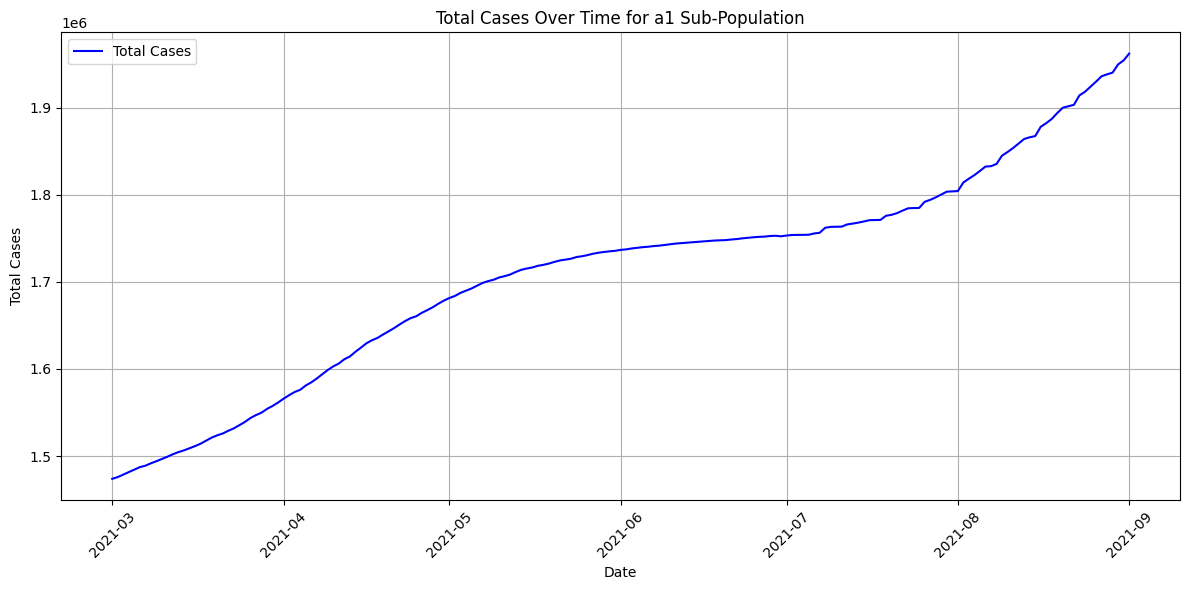

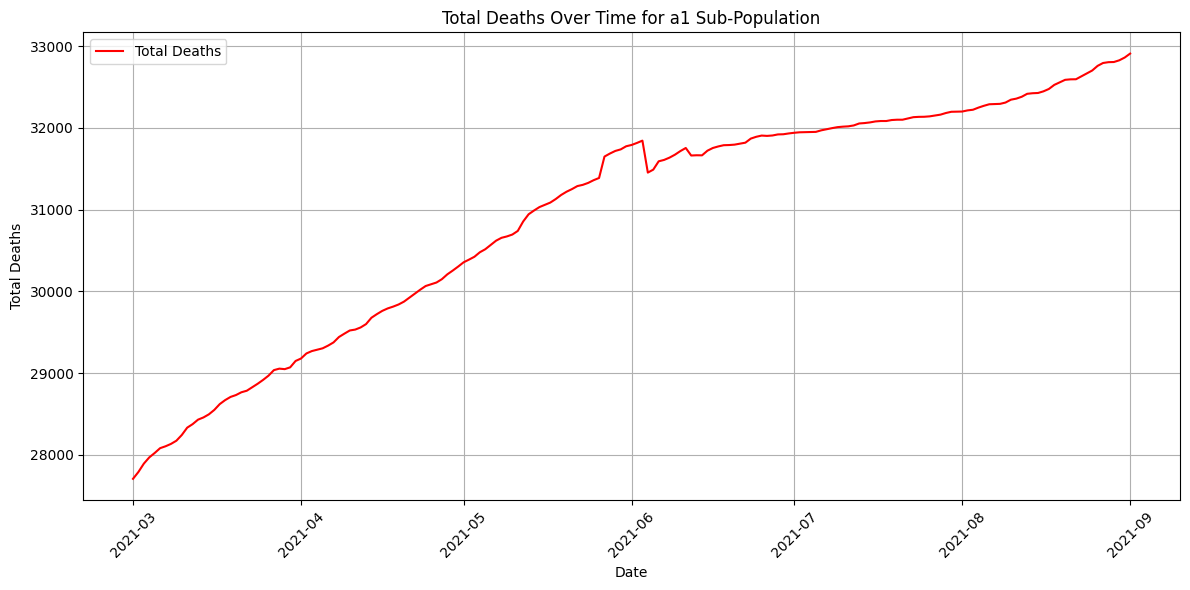

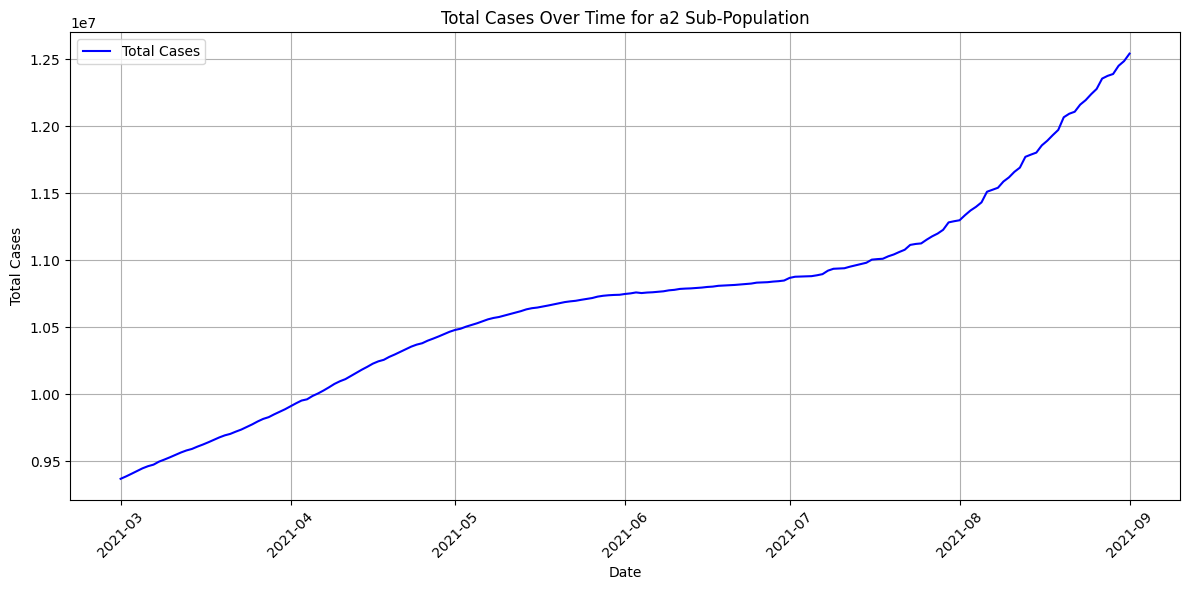

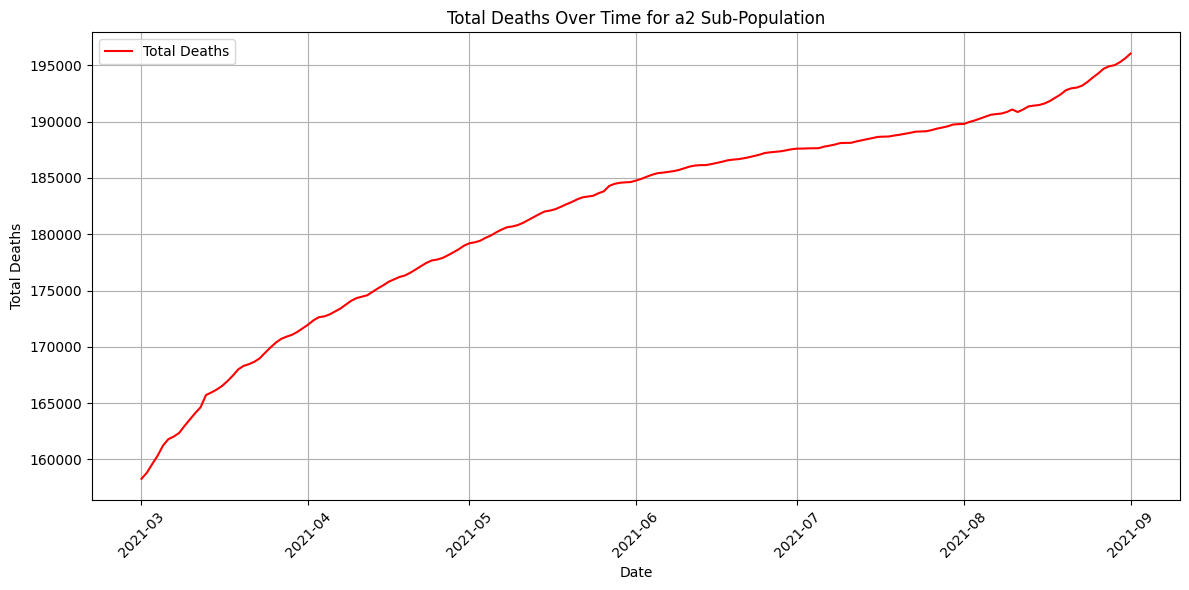

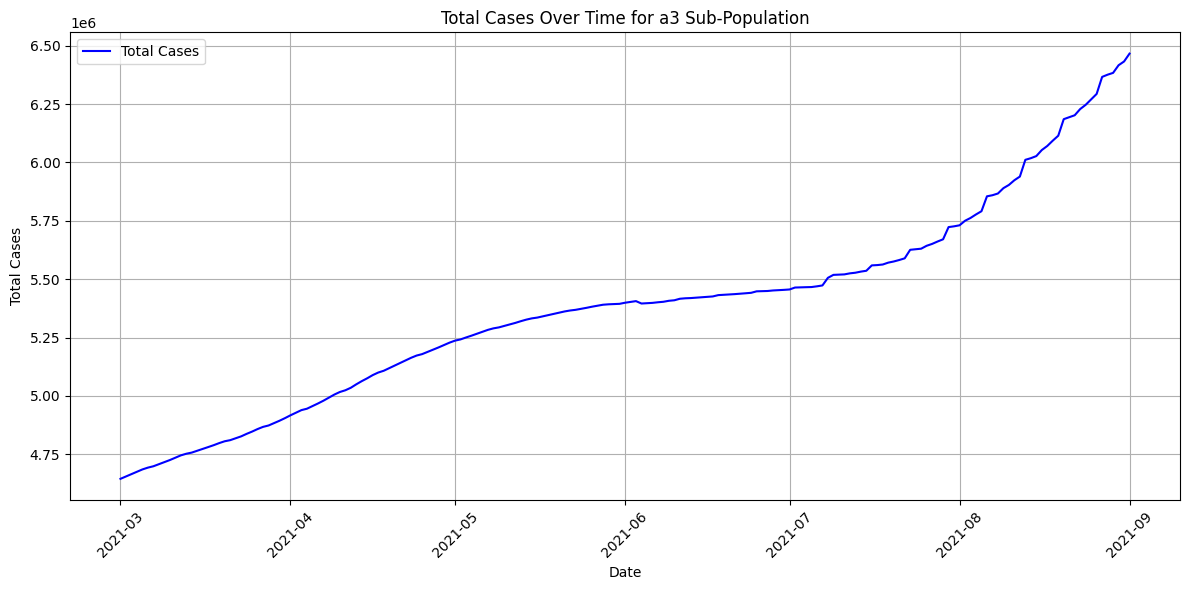

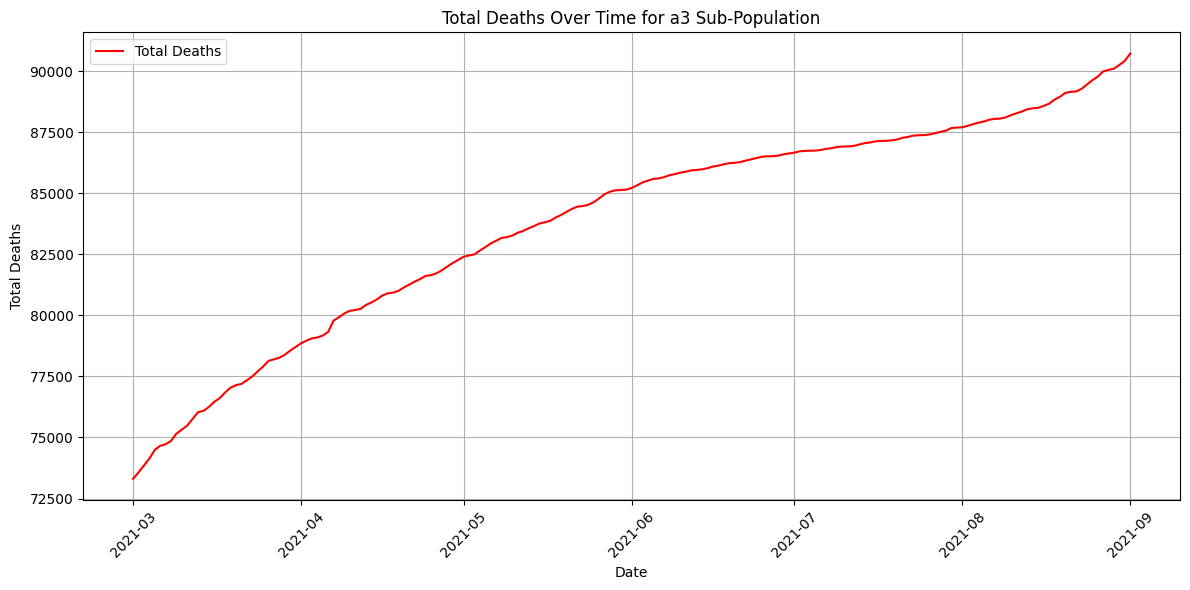

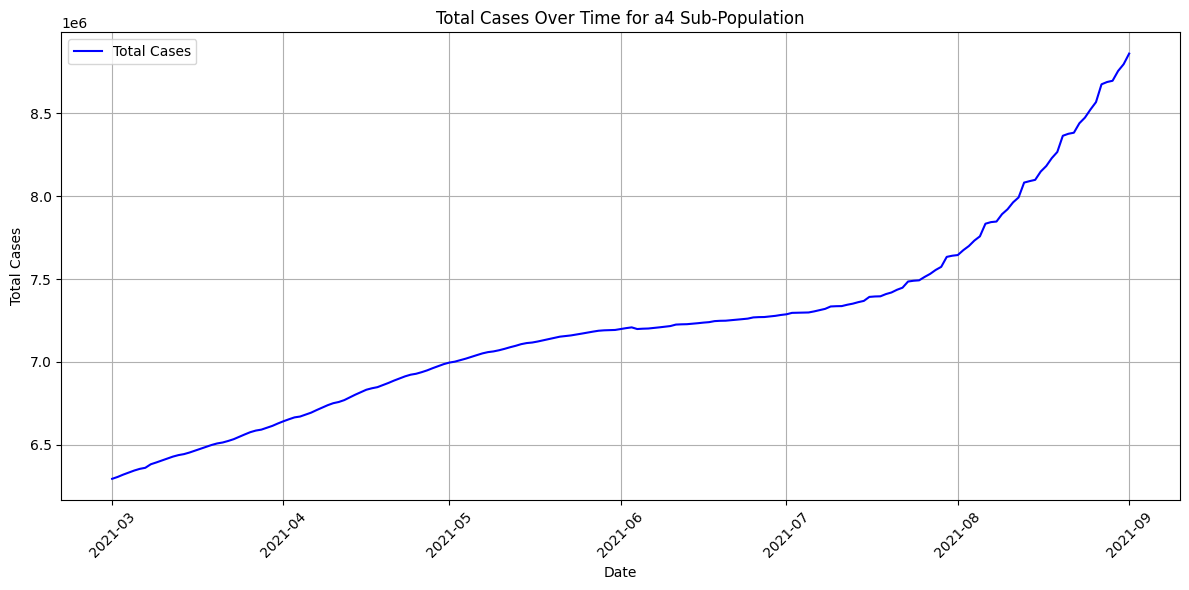

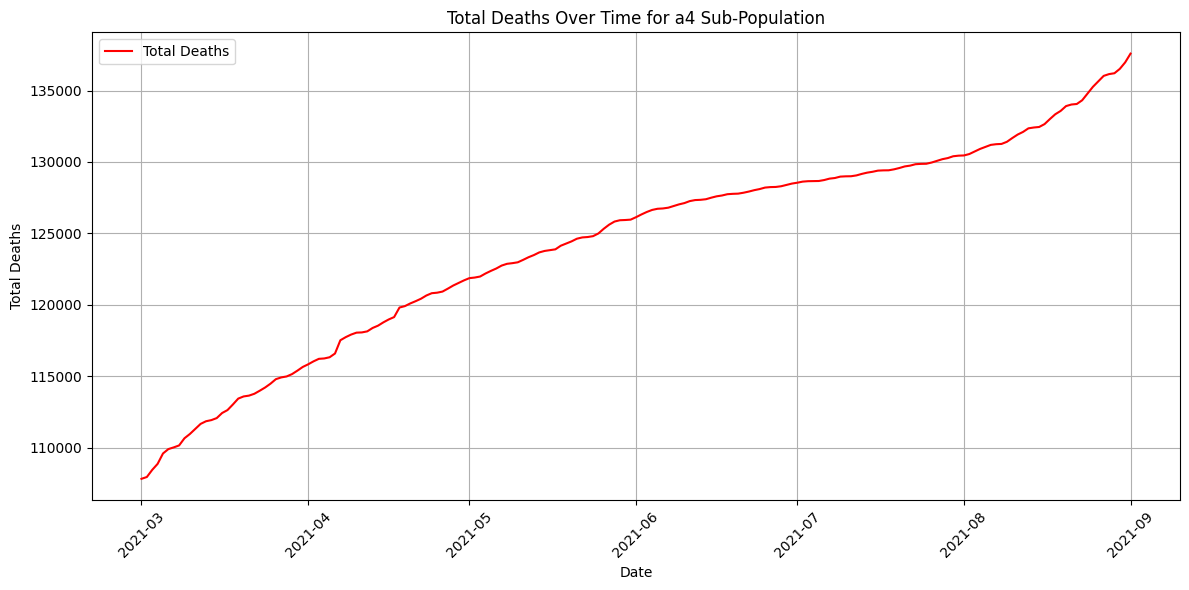

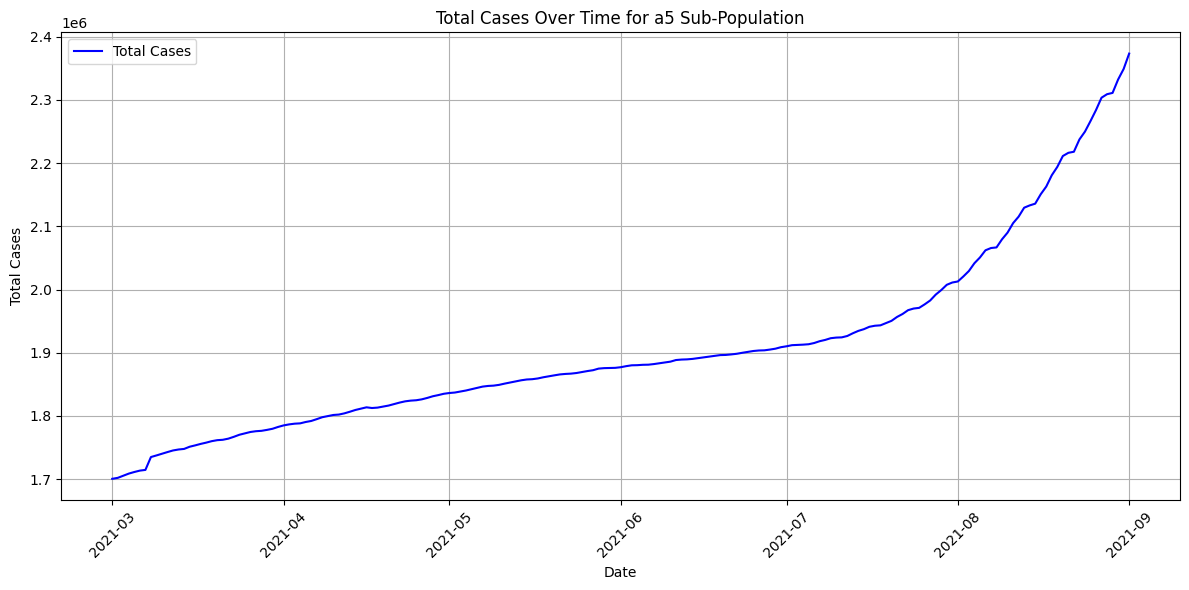

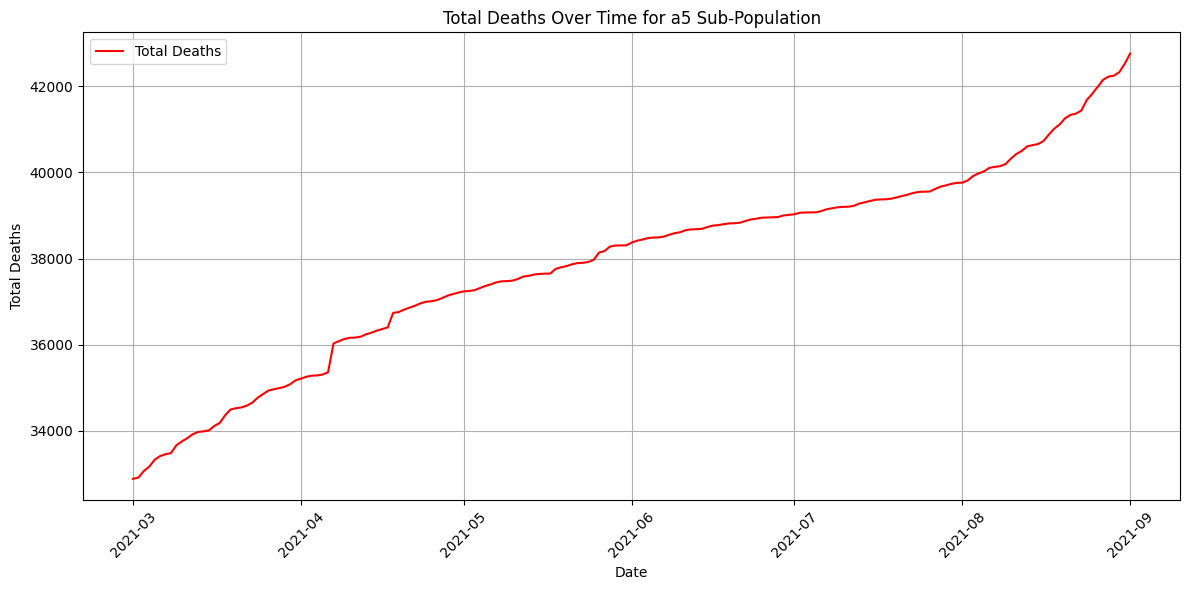

In [ ]:
# Function to plot time series for a category
def plot_category_time_series(category, category_counties):
    # Filter COVID-19 data for counties in the category
    category_data = date_filtered_data[date_filtered_data['county_state'].isin(category_counties)]

    # Group by date and aggregate cases and deaths
    category_aggregated = category_data.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

    # Plot cases over time
    plt.figure(figsize=(12, 6))
    plt.plot(category_aggregated['date'], category_aggregated['cases'], color='blue', label='Total Cases')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.title(f'Total Cases Over Time for {category} Sub-Population')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    # Plot deaths over time
    plt.figure(figsize=(12, 6))
    plt.plot(category_aggregated['date'], category_aggregated['deaths'], color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths')
    plt.title(f'Total Deaths Over Time for {category} Sub-Population')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Plotting for each category
plot_category_time_series('a1', a1)
plot_category_time_series('a2', a2)
plot_category_time_series('a3', a3)
plot_category_time_series('a4', a4)
plot_category_time_series('a5', a5)


#Population Estimation

In [ ]:
pd.options.mode.chained_assignment = None  # or 'raise'


In [ ]:
cdf = pd.read_excel('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/filtered_PopulationEstimates.xlsx', skiprows=4)


new_df1 = cdf[~cdf['State'].str.endswith(('AK', 'HI'))].copy()

# Dictionary mapping state abbreviations to full names
state_abbr_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New-Hampshire', 'NJ': 'New-Jersey', 'NM': 'New-Mexico', 'NY': 'New-York',
    'NC': 'North-Carolina', 'ND': 'North-Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode-Island', 'SC': 'South-Carolina',
    'SD': 'South-Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West-Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Map state abbreviations to full names
new_df1.loc[:, 'State'] = new_df1['State'].map(state_abbr_to_full)

# Drop rows with missing values in 'State' column
new_df1 = new_df1.dropna(subset=['State'])
# Convert to lower case and strip any extra spaces
new_df1.loc[:, 'Area_Name'] = new_df1['Area_Name'].str.lower().str.strip()
new_df1.loc[:, 'State'] = new_df1['State'].str.lower().str.strip()

# Concatenate area name and state with a hyphen
new_df1.loc[:, 'Area_Name_State'] = new_df1['Area_Name'] + '-' + new_df1['State']

print("Total counties excluding Alaska and Hawaii after concatenating state & county Pop US counties:", len(new_df1))

new_df2 = new_df1[['Area_Name_State', 'POP_ESTIMATE_2021']]
new_df2.head()


Total counties excluding Alaska and Hawaii after concatenating state & county Pop US counties: 3164


,Area_Name_State,POP_ESTIMATE_2021
1,alabama-alabama,5049846.0
2,autauga-alabama,59210.0
3,baldwin-alabama,239361.0
4,barbour-alabama,24539.0
5,bibb-alabama,22370.0


In [ ]:
# Count unique values of Area_Name_State
unique_count = new_df1['Area_Name_State'].nunique()
print("Number of unique Area_Name_State values:", unique_count)

Number of unique Area_Name_State values: 3158


#Total Population of A1 category

In [ ]:
sum1 = 0
for county in a1:
  sum1 += new_df2[new_df2['Area_Name_State'] == county]['POP_ESTIMATE_2021'].sum()
print(sum1)

24621633.0


#Total Population of A2 category

In [ ]:
sum2 = 0
for county in a2:
  sum2 += new_df2[new_df2['Area_Name_State'] == county]['POP_ESTIMATE_2021'].sum()
print(sum2)

129205279.0


#Total Population of A3 category

In [ ]:
sum3 = 0
for county in a3:
  sum3 += new_df2[new_df2['Area_Name_State'] == county]['POP_ESTIMATE_2021'].sum()
print(sum3)

65166588.0


#Total Population of A4 category

In [ ]:
sum4 = 0
for county in a4:
  sum4 += new_df2[new_df2['Area_Name_State'] == county]['POP_ESTIMATE_2021'].sum()
print(sum4)

92384778.0


#Total Population of A5 category

In [ ]:
sum5 = 0
for county in a5:
  sum5 += new_df2[new_df2['Area_Name_State'] == county]['POP_ESTIMATE_2021'].sum()
print(sum5)

19233157.0


In [ ]:
#verification
total_population1 = 0
cnt1=0
for county_name in a1:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population1 += county_population_sum
        cnt1+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population2 = 0
cnt2=0
for county_name in a2:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population2 += county_population_sum
        cnt2+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population3 = 0
cnt3=0
for county_name in a3:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population3 += county_population_sum
        cnt3+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population4 = 0
cnt4=0
for county_name in a4:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population4 += county_population_sum
        cnt4+=1
        # print(f"Population of {county_name}: {county_population_sum}")

total_population5 = 0
cnt5=0
for county_name in a5:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    # If there are matching rows, sum their POP_ESTIMATE_2021

    if not matching_county.empty:
        county_population_sum = matching_county['POP_ESTIMATE_2021'].sum()
        total_population5 += county_population_sum
        cnt5+=1
        # print(f"Population of {county_name}: {county_population_sum}")


print(f"Total population of matched counties: {total_population1} and count: {cnt1}")
print(f"Total population of matched counties: {total_population2} and count: {cnt2}")
print(f"Total population of matched counties: {total_population3} and count: {cnt3}")
print(f"Total population of matched counties: {total_population4} and count: {cnt4}")
print(f"Total population of matched counties: {total_population5} and count: {cnt5}")
print(cnt1+cnt2+cnt3+cnt4+cnt5)

Total population of matched counties: 24621633.0 and count: 48
Total population of matched counties: 129205279.0 and count: 334
Total population of matched counties: 65166588.0 and count: 324
Total population of matched counties: 92384778.0 and count: 1372
Total population of matched counties: 19233157.0 and count: 978
3056


#verifying the dataframes

In [ ]:
nan_count = new_df2.isna().sum()
print("Number of NaN values in each column:\n", nan_count)

Number of NaN values in each column:
 Area_Name_State      0
POP_ESTIMATE_2021    8
dtype: int64


In [ ]:
3056+90

3146

#No data for below counites

In [ ]:
nan_rows = new_df2[new_df2.isna().any(axis=1)][['Area_Name_State', 'POP_ESTIMATE_2021']]
print("Rows with NaN values in specified columns:\n", nan_rows)

Rows with NaN values in specified columns:
             Area_Name_State  POP_ESTIMATE_2021
317   fairfield-connecticut                NaN
318    hartford-connecticut                NaN
319  litchfield-connecticut                NaN
320   middlesex-connecticut                NaN
321   new haven-connecticut                NaN
322  new london-connecticut                NaN
323     tolland-connecticut                NaN
324     windham-connecticut                NaN


In [ ]:
# #verification
#ward 1 to 8,data is not there, in csv of pop estimate
cnt1=0
for county_name in a1:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    if matching_county.empty:
        cnt1+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt1)

# All missing Virginia counties have "city" at the end in the counties file
# Brooklyn/Kings County (FIPS: 36047) and Manhattan/New York County (FIPS: 36047),
# along with The Bronx/Bronx County (FIPS: 36005), Queens/Queens County (FIPS: 36061),
# and Staten Island/Richmond County (FIPS: 36085) are all combined as New York City in counties file
# All of DC is combined into District of Colombia in the counties file

No matching county found for alexandria-virginia in the new_df2 DataFrame.
No matching county found for charlottesville-virginia in the new_df2 DataFrame.
No matching county found for falls church-virginia in the new_df2 DataFrame.
No matching county found for petersburg-virginia in the new_df2 DataFrame.
No matching county found for brooklyn-new-york in the new_df2 DataFrame.
No matching county found for manhattan-new-york in the new_df2 DataFrame.
No matching county found for ward 1-district-of-columbia in the new_df2 DataFrame.
No matching county found for ward 2-district-of-columbia in the new_df2 DataFrame.
No matching county found for ward 3-district-of-columbia in the new_df2 DataFrame.
No matching county found for ward 4-district-of-columbia in the new_df2 DataFrame.
No matching county found for ward 5-district-of-columbia in the new_df2 DataFrame.
No matching county found for ward 6-district-of-columbia in the new_df2 DataFrame.
No matching county found for ward 7-district-of-

In [ ]:
matches = new_df2[new_df2['Area_Name_State'].str.startswith('Alexandria')]

# Display the matches
print(matches)

Empty DataFrame
Columns: [Area_Name_State, POP_ESTIMATE_2021]
Index: []


In [ ]:
cnt2 = 0
for county_name in a2:
    # Convert county_name to lowercase for case-insensitive comparison
    county_name_lower = county_name.lower()

    # Find rows where Area_Name_State matches county_name (case-insensitive)
    matching_county = new_df2[new_df2['Area_Name_State'].str.lower() == county_name_lower]

    if matching_county.empty:
        cnt2 += 1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")

print(cnt2)

# All missing Virginia counties have "city" at the end in the counties file
# Jeff Davis is Jefferson Davis in counties file
# There is a St. Louis (FIPS: 29189) and a St. Louis city (FIPS: 29510) in the counties file. However, the election data shows
# a separate St. Louis location (FIPS: 27137), which, due to different naming rules for the files, is being incorrectly matched
# to the first St. Louis location
# There is an error in the name for Dona Ana in the counties file due to the tilde (~ on n) in the name

No matching county found for danville-virginia in the new_df2 DataFrame.
No matching county found for emporia-virginia in the new_df2 DataFrame.
No matching county found for fredericksburg-virginia in the new_df2 DataFrame.
No matching county found for hampton-virginia in the new_df2 DataFrame.
No matching county found for harrisonburg-virginia in the new_df2 DataFrame.
No matching county found for hopewell-virginia in the new_df2 DataFrame.
No matching county found for lexington-virginia in the new_df2 DataFrame.
No matching county found for manassas-virginia in the new_df2 DataFrame.
No matching county found for manassas park-virginia in the new_df2 DataFrame.
No matching county found for martinsville-virginia in the new_df2 DataFrame.
No matching county found for newport news-virginia in the new_df2 DataFrame.
No matching county found for norfolk-virginia in the new_df2 DataFrame.
No matching county found for portsmouth-virginia in the new_df2 DataFrame.
No matching county found for

In [ ]:
cnt3=0
for county_name in a3:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    if matching_county.empty:
        cnt3+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt3)

# All missing Virginia counties have "city" at the end in the counties file
# Saint Lawrence is St. Laurence in the counties file
# Saint Francis is St. Francis in the counties file

No matching county found for chesapeake-virginia in the new_df2 DataFrame.
No matching county found for lynchburg-virginia in the new_df2 DataFrame.
No matching county found for virginia beach-virginia in the new_df2 DataFrame.
No matching county found for waynesboro-virginia in the new_df2 DataFrame.
No matching county found for saint lawrence-new-york in the new_df2 DataFrame.
No matching county found for saint francis-arkansas in the new_df2 DataFrame.
6


In [ ]:
cnt4=0
for county_name in a4:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    if matching_county.empty:
        cnt4+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt4)

# All missing Virginia counties have "city" at the end in the counties file
# Desoto is De Soto in counties file
# Dewitt is De Witt in the counties file
# Jodaviess is Jo Daviess in the the counties file
# Staten Island is part of the combined New York City in the counties file
# Debaca is De Baca in the counties file

No matching county found for bristol-virginia in the new_df2 DataFrame.
No matching county found for buena vista-virginia in the new_df2 DataFrame.
No matching county found for colonial heights-virginia in the new_df2 DataFrame.
No matching county found for covington-virginia in the new_df2 DataFrame.
No matching county found for galax-virginia in the new_df2 DataFrame.
No matching county found for norton-virginia in the new_df2 DataFrame.
No matching county found for poquoson-virginia in the new_df2 DataFrame.
No matching county found for salem-virginia in the new_df2 DataFrame.
No matching county found for desoto-louisiana in the new_df2 DataFrame.
No matching county found for dewitt-illinois in the new_df2 DataFrame.
No matching county found for jodaviess-illinois in the new_df2 DataFrame.
No matching county found for staten island-new-york in the new_df2 DataFrame.
No matching county found for debaca-new-mexico in the new_df2 DataFrame.
13


In [ ]:
cnt5=0
for county_name in a5:
    # Find rows where Area_Name matches county_name
    matching_county = new_df2[new_df2['Area_Name_State'] == county_name]

    if matching_county.empty:
        cnt5+=1
        print(f"No matching county found for {county_name} in the new_df2 DataFrame.")
print(cnt5)

# De Witt is DeWitt in the counties file
# La Vaca is Lavaca in the counties file


No matching county found for de witt-texas in the new_df2 DataFrame.
No matching county found for la vaca-texas in the new_df2 DataFrame.
No matching county found for jeff davis-louisiana in the new_df2 DataFrame.
No matching county found for leflore-oklahoma in the new_df2 DataFrame.
No matching county found for idaho county-idaho in the new_df2 DataFrame.
5
